EDA_Análise Exploratória de Dados

Etapa 1 - Carregamento do Dataset

In [4]:
import pandas as pd

In [5]:
url = ("canaisnerds.csv")

In [6]:
df = pd.read_csv("canaisnerds.csv", sep=";")

In [7]:
df

,canal,descrição,endereço,categoria,qtde_inscritos (aprox.),conhece_canal
0,Pipoca e Nanquim,"Conteúdo sobre HQs, quadrinhos, livros e cultu...",https://www.youtube.com/@pipocaenanquim,Quadrinhos/Cultura Pop,1.81M,0
1,Coisa de Nerd,"Vídeos de curiosidades, ciência, desafios e re...",https://www.youtube.com/@republicacoisadenerd,Curiosidades/Entretenimento,2.55M,0
2,Naruhodo,Podcast com a missão de usar a ciência para ex...,https://www.youtube.com/@CanalNaruhodo,Ciência/Curiosidades,441K,0
3,GugaCast,"Canal do podcast GugaCast, focado em entrevist...",https://www.youtube.com/@gugacastpodcast,Podcast/Histórias,60K,0
4,Peixe Babel,"Curiosidades sobre zoologia, biologia, e o mun...",https://www.youtube.com/@peixebabel,Ciência/Biologia,412K,0
5,Ciência Toda Dia,Canal totalmente voltado para assuntos que pod...,https://www.youtube.com/@CienciaTodoDia,Ciência/Curiosidades,7.49M,0
6,Bola Presa,"Canal do blog Bola Presa, focado em notícias, ...",https://www.youtube.com/@bolapresa,Esportes/NBA,34.7K,0
7,Rebobinando,"Canal sobre filmes, séries, cultura pop, nosta...",https://www.youtube.com/@Rebobinando,Cultura Pop/Cinema,549K,0
8,Xadrez Brasil,"Conteúdo sobre xadrez, aulas, partidas e análi...",https://www.youtube.com/@xadrezbrasil,Esportes/Xadrez,158K,0
9,99 Vidas,"Canal e podcast com foco em games retrô, nosta...",https://www.youtube.com/@99vidasBr,Games/Nostalgia,129K,0


In [8]:
df.head()

,canal,descrição,endereço,categoria,qtde_inscritos (aprox.),conhece_canal
0,Pipoca e Nanquim,"Conteúdo sobre HQs, quadrinhos, livros e cultu...",https://www.youtube.com/@pipocaenanquim,Quadrinhos/Cultura Pop,1.81M,0
1,Coisa de Nerd,"Vídeos de curiosidades, ciência, desafios e re...",https://www.youtube.com/@republicacoisadenerd,Curiosidades/Entretenimento,2.55M,0
2,Naruhodo,Podcast com a missão de usar a ciência para ex...,https://www.youtube.com/@CanalNaruhodo,Ciência/Curiosidades,441K,0
3,GugaCast,"Canal do podcast GugaCast, focado em entrevist...",https://www.youtube.com/@gugacastpodcast,Podcast/Histórias,60K,0
4,Peixe Babel,"Curiosidades sobre zoologia, biologia, e o mun...",https://www.youtube.com/@peixebabel,Ciência/Biologia,412K,0


Etapa 2 - Limpeza dos Dados (Retirar a Coluna Endereço do Canal (por ser uma url e não trazer beneficio))

In [9]:
# Quero criar um novo dataframe que vai retirar a coluna endereço do canal
df_novo = df.drop(columns=['endereço'])

In [10]:
df_novo.head()

,canal,descrição,categoria,qtde_inscritos (aprox.),conhece_canal
0,Pipoca e Nanquim,"Conteúdo sobre HQs, quadrinhos, livros e cultu...",Quadrinhos/Cultura Pop,1.81M,0
1,Coisa de Nerd,"Vídeos de curiosidades, ciência, desafios e re...",Curiosidades/Entretenimento,2.55M,0
2,Naruhodo,Podcast com a missão de usar a ciência para ex...,Ciência/Curiosidades,441K,0
3,GugaCast,"Canal do podcast GugaCast, focado em entrevist...",Podcast/Histórias,60K,0
4,Peixe Babel,"Curiosidades sobre zoologia, biologia, e o mun...",Ciência/Biologia,412K,0


In [11]:
# Quero renomear a coluna qtde_inscritos(aprox.) para qtde_inscritos
df_novo = df_novo.rename(columns={'qtde_inscritos (aprox.)': 'qtde_inscritos'})
# nao renomeou que erro ocorreu aruma ai
df_novo.head()

,canal,descrição,categoria,qtde_inscritos,conhece_canal
0,Pipoca e Nanquim,"Conteúdo sobre HQs, quadrinhos, livros e cultu...",Quadrinhos/Cultura Pop,1.81M,0
1,Coisa de Nerd,"Vídeos de curiosidades, ciência, desafios e re...",Curiosidades/Entretenimento,2.55M,0
2,Naruhodo,Podcast com a missão de usar a ciência para ex...,Ciência/Curiosidades,441K,0
3,GugaCast,"Canal do podcast GugaCast, focado em entrevist...",Podcast/Histórias,60K,0
4,Peixe Babel,"Curiosidades sobre zoologia, biologia, e o mun...",Ciência/Biologia,412K,0


In [12]:
# crie um novo dataframe apenas com as colunas canal e qtde_inscritos
df_novo_frame = df_novo[['canal', 'qtde_inscritos']]

In [13]:
df_novo_frame

,canal,qtde_inscritos
0,Pipoca e Nanquim,1.81M
1,Coisa de Nerd,2.55M
2,Naruhodo,441K
3,GugaCast,60K
4,Peixe Babel,412K
5,Ciência Toda Dia,7.49M
6,Bola Presa,34.7K
7,Rebobinando,549K
8,Xadrez Brasil,158K
9,99 Vidas,129K


Etapa 3 - Definir as colunas X e Y para mostrar qual o canal tem mais inscritos

In [14]:
! pip install matplotlib

In [15]:
! pip install --upgrade pip

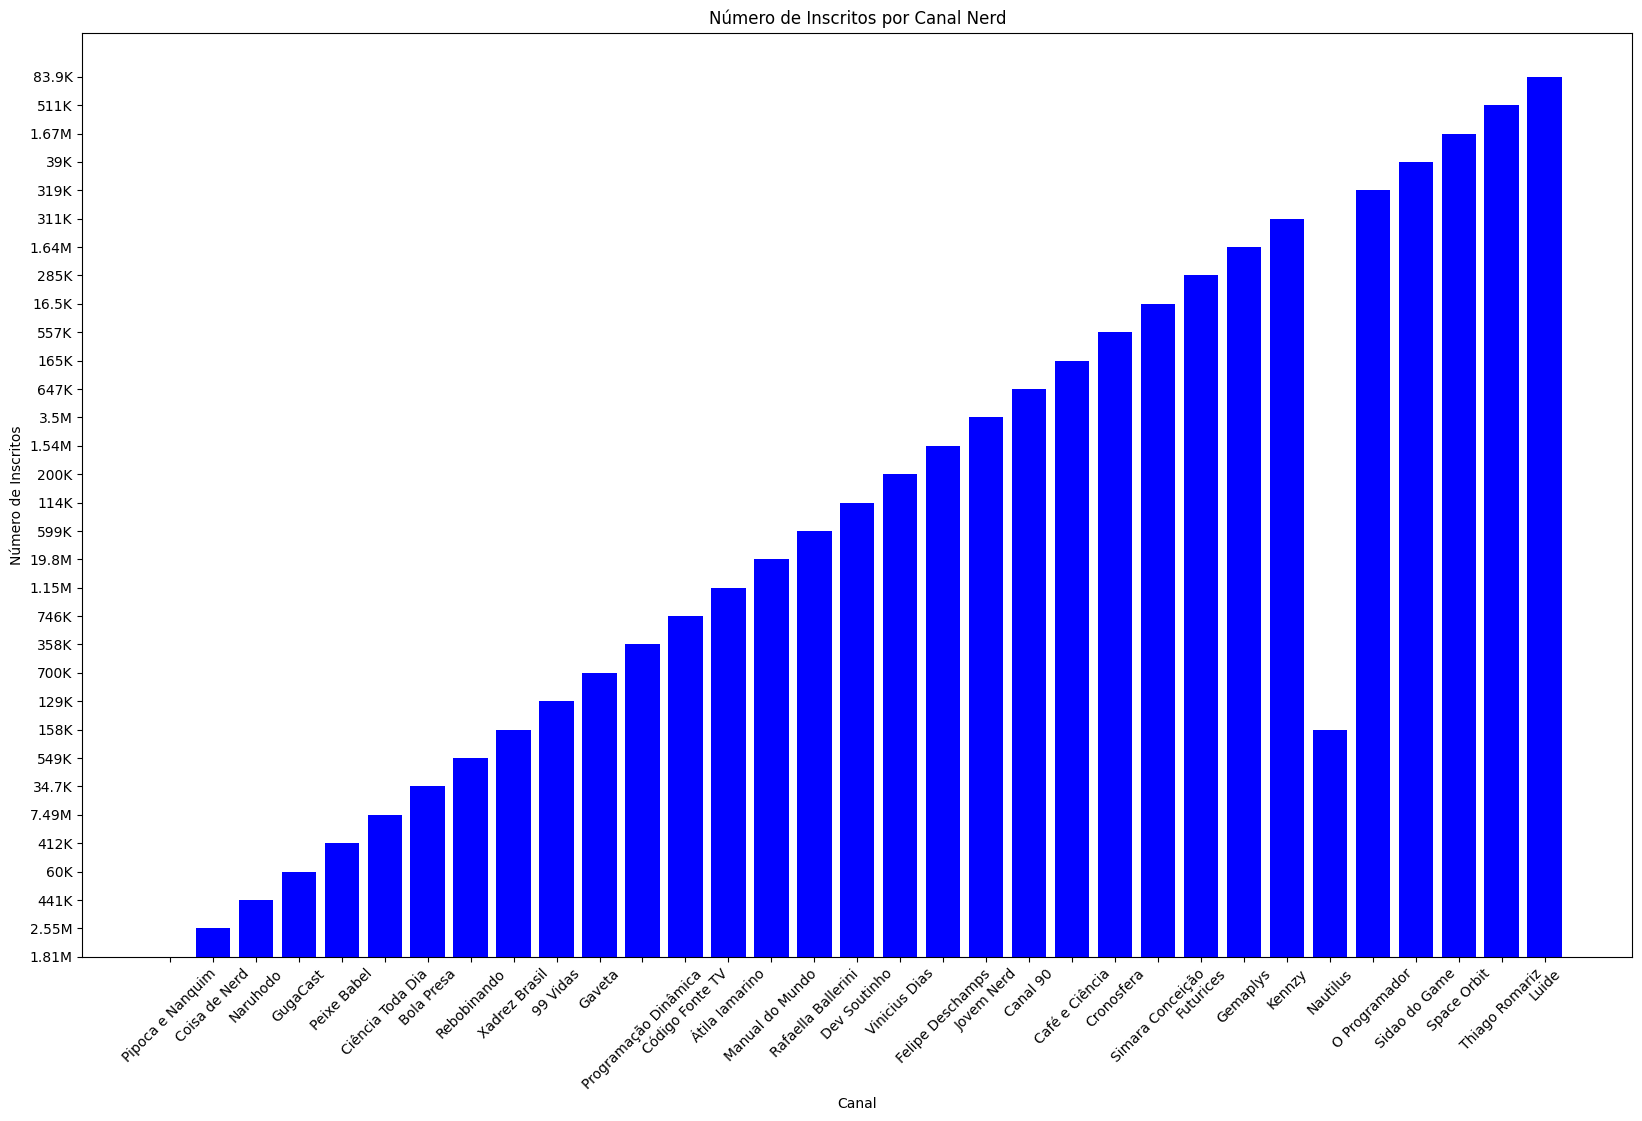

In [23]:
# Vamos definir o grafico x é o canal e y é o número de inscritos
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.bar(df_novo_frame['canal'], df_novo_frame['qtde_inscritos'], color='blue')
plt.xlabel('Canal') 
plt.ylabel('Número de Inscritos')
plt.title('Número de Inscritos por Canal Nerd')
plt.xticks(rotation=45)
plt.show()

Etapa 4 - Simplificar o Eixo Y (Número de Inscritos)

In [22]:
def converter_inscritos(valor):
    if isinstance(valor, str):
        valor = valor.upper().replace(',', '.')
        if 'M' in valor:
            return float(valor.replace('M', '')) * 1_000_000
        elif 'K' in valor:
            return float(valor.replace('K', '')) * 1_000
        elif 'B' in valor:
            return float(valor.replace('B', '')) * 1_000_000_000
    try:
        return float(valor)
    except:
        return 0 # Ou trate o erro como preferir

# Aplique a função ao seu DataFrame
df_novo['qtde_inscritos'] = df_novo['qtde_inscritos'].apply(converter_inscritos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   canal           33 non-null     object 
 1   descrição       33 non-null     object 
 2   categoria       33 non-null     object 
 3   qtde_inscritos  33 non-null     float64
 4   conhece_canal   33 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ KB


<Axes: xlabel='canal'>

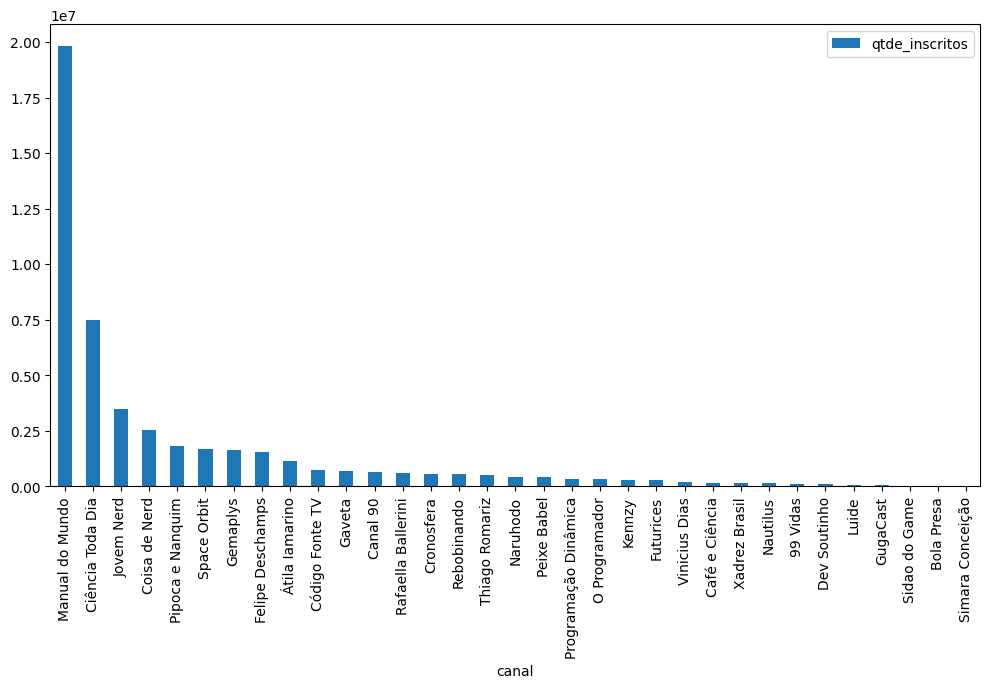

In [25]:
# ver primeiras/últimas linhas
df_novo.head()
df_novo.tail()

# amostra aleatória
df_novo.sample(10)

# tipos e resumo
df_novo.info()
df_novo['qtde_inscritos'].dtype
df_novo['qtde_inscritos'].describe()

# ver valores convertidos nas primeiras linhas
df_novo['qtde_inscritos'].head()

# ordenar para ver maiores canais
df_novo.sort_values('qtde_inscritos', ascending=False).head(10)

# (opcional) plot rápido inline para confirmar visualmente
df_novo.sort_values('qtde_inscritos', ascending=False).plot.bar(x='canal', y='qtde_inscritos', figsize=(12,6))

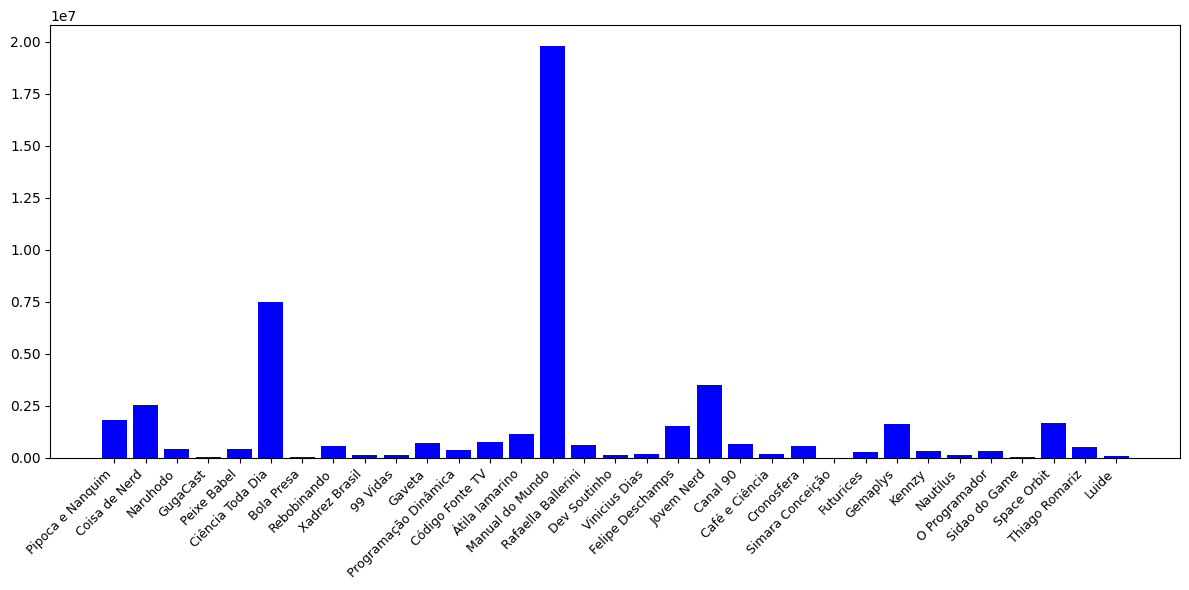

In [ ]:
df_novo.head()
plt.figure(figsize=(12,6))
plt.bar(df_novo['canal'], df_novo['qtde_inscritos'], color='blue')  
plt.xticks(rotation=45, ha='right', fontsize=9) # rotaciona e alinha à direita
plt.tight_layout() # ajusta margens para caber texto
plt.show()

Etapa 4 - Criar um Gráfico MatplotLib de Barras

Os dados X e Y , Legenda X e uma Legenda Y e um Título

In [38]:
df_novo = df_novo.sort_values('qtde_inscritos', ascending=True)

In [39]:
import matplotlib.ticker as ticker

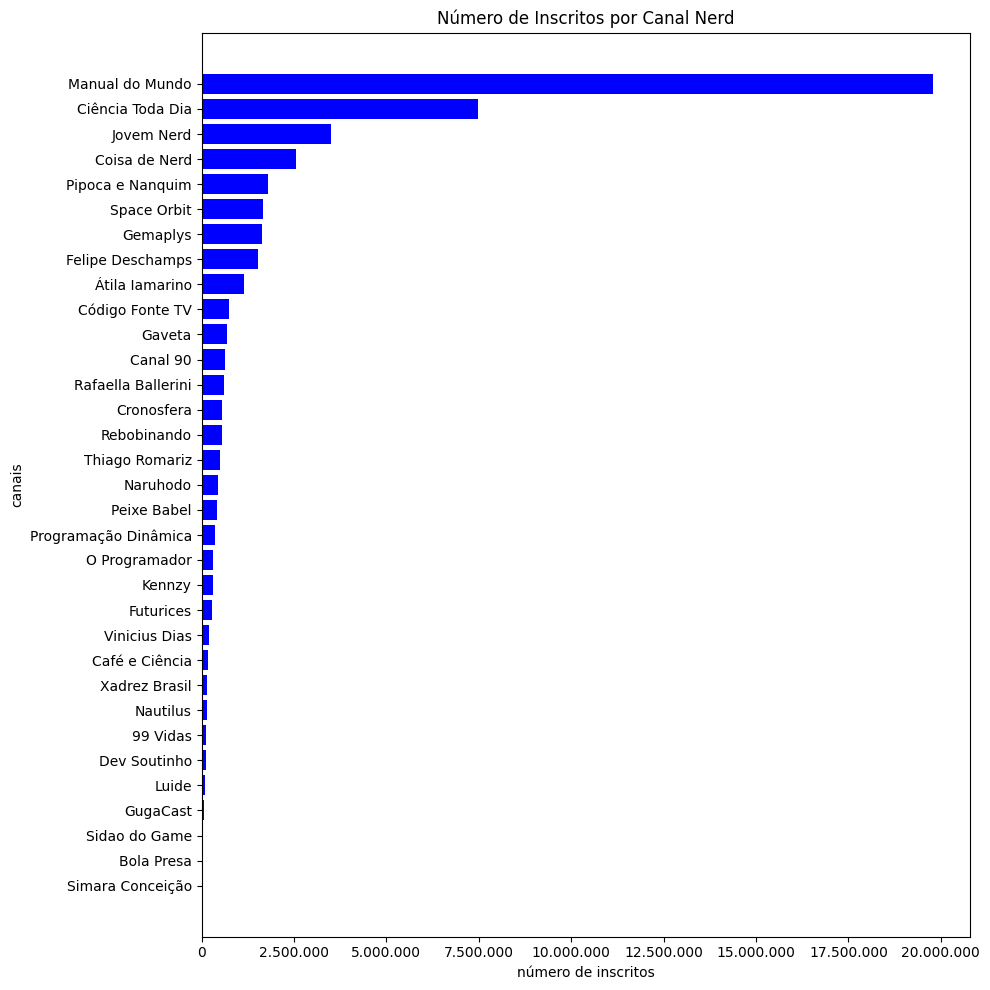

In [40]:
plt.figure(figsize=(10,10)) # Aumente o tamanho para mais espaço
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().xaxis.set_major_formatter(formatter)
plt.barh(df_novo['canal'], df_novo['qtde_inscritos'], color='blue')
plt.ylabel('Número de Inscritos (Escala Numérica)')
plt.xlabel('número de inscritos') 
plt.ylabel('canais')
plt.title('Número de Inscritos por Canal Nerd')
plt.tight_layout()

plt.show()

In [41]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 23 to 14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   canal           33 non-null     object 
 1   descrição       33 non-null     object 
 2   categoria       33 non-null     object 
 3   qtde_inscritos  33 non-null     float64
 4   conhece_canal   33 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ KB


In [42]:
# O canal que tem mais inscritos
# Criando uma condicao mostrar o canal com mais inscritos
canal_mais_inscritos = df_novo.loc[df_novo['qtde_inscritos'].idxmax()]
canal_mais_inscritos

canal                                               Manual do Mundo
descrição         Experiências, curiosidades e tutoriais de "Faç...
categoria                              Curiosidades/Faça Você Mesmo
qtde_inscritos                                           19800000.0
conhece_canal                                                     0
Name: 14, dtype: object